# Análise Histórica do Campeonato Brasileiro Série A (2006–2024)

## Integrantes
- Dennynson Scheydt Medeiros Nascimento
- Matias Monteiro de Araújo
- Vinícius da Silva Cunha
- João Matheus Silva Paiva

## Introdução

O futebol brasileiro é um fenômeno cultural e social, e o Campeonato Brasileiro Série A representa o ápice da competição nacional. Desde sua profissionalização, o campeonato reúne os melhores clubes do país, sendo acompanhado por milhões de torcedores e gerando uma grande quantidade de dados que podem ser analisados para extrair padrões, comparações e curiosidades.

Este projeto, desenvolvido na disciplina *Introdução à Ciência de Dados*, teve como objetivo central a construção de um conjunto de dados consolidado com as classificações finais do Brasileirão Série A entre os anos de 2006 e 2024. O trabalho abordou tanto o aspecto técnico da coleta e organização dos dados, quanto a consolidação de uma base estruturada pronta para análises sobre o desempenho dos clubes ao longo dos anos.

---

## Dados Usados

O conjunto de dados foi construído a partir de múltiplas fontes:

- **API APIFootball** — utilizada para coletar os dados dos anos de **2021 a 2023**.
- **API Football-data** — usada para obter os dados da temporada **2024**.
- **Web scraping com BeautifulSoup** — aplicado para coletar os dados de **2006 a 2020**, com informações extraídas do site **WorldFootball**.

Após a coleta, os dados foram padronizados e organizados em um único arquivo CSV, contendo as estatísticas finais de cada clube ao término de cada edição do campeonato. O arquivo serve como base para possíveis análises estatísticas e visuais futuras.

---

## Estrutura do Dataset

O dataset contém a tabela final de classificação de cada temporada, com as seguintes colunas:

| Coluna            | Descrição                                          | Exemplo (Flamengo 2019) |
|-------------------|----------------------------------------------------|--------------------------|
| **Temporada**     | Ano do campeonato                                  | 2019                     |
| **Posição**       | Colocação final do time na tabela                  | 1                        |
| **Time**          | Nome oficial do clube                              | Flamengo RJ              |
| **Pontos**        | Total de pontos conquistados                       | 90                       |
| **Saldo de Gols** | Diferença entre gols marcados e sofridos           | 49                       |
| **Jogos**         | Total de partidas disputadas                       | 38                       |
| **Vitórias**      | Número de vitórias                                 | 28                       |
| **Empates**       | Número de empates                                  | 6                        |
| **Derrotas**      | Número de derrotas                                 | 4                        |
| **Gols Marcados** | Total de gols a favor                              | 86                       |
| **Gols Sofridos** | Total de gols contra                               | 37                       |

---

## Exploração Inicial dos Dados

Nesta etapa, realizamos uma leitura inicial do arquivo CSV contendo o dataset, a fim de verificar a estrutura da base, os tipos de dados e identificar possíveis inconsistências.

---

# Pré-processamento
## Limpeza e Transformação dos Dados Necessários

Tendo em vista que a coleta foi realizada a partir de três fontes diferentes, tivemos que fazer alguns tratamentos ainda na coleta, como os dados coletados - que são as respectivas colunas do dataset, a fim de uniformizar os dados coletados para todos os times de todas as temporadas. Além disso, também foi detectado que os nomes dos clubes variavam de acordo com a fonte da qual extraímos, sendo possível encontrar três variações de Flamengo - o que poderia nos trazer dificuldades na hora da análise, para isso fizemos um mapeamento buscando as variações dos nomes dos times e definindo apenas um, como pode ser visto no dicionário a baixo.

In [10]:
times = {
        "Botafogo FR": "Botafogo",
        "Botafogo - RJ": "Botafogo",
        "CR Vasco da Gama": "Vasco",
        "Vasco da Gama - RJ": "Vasco",
        "Cruzeiro EC": "Cruzeiro",
        "EC Bahia": "Bahia",
        "Bahia - BA": "Bahia",
        "SC Corinthians Paulista": "Corinthians",
        "Corinthians SP": "Corinthians",
        "SC Internacional": "Internacional",
        "Fortaleza EC": "Fortaleza",
        "Fortaleza - CE": "Fortaleza",
        "CR Flamengo": "Flamengo",
        "Flamengo RJ": "Flamengo",
        "São Paulo FC": "São Paulo",
        "Sao Paulo": "São Paulo",
        "Sport Club Recife": "Sport",
        "SE Palmeiras": "Palmeiras",
        "AC Goianiense": "Atlético Goianiense",
        "Atletico Goianiense": "Atlético Goianiense",
        "Criciúma EC": "Criciúma",
        "Criciúma - SC": "Criciúma",
        "Cuiabá EC": "Cuiabá",
        "Cuiaba": "Cuiabá",
        "CA Paranaense": "Athletico Paranaense",
        "Atletico Paranaense": "Athletico Paranaense",
        "RB Bragantino": "Bragantino",
        "Red Bull Bragantino": "Bragantino",
        "EC Juventude": "Juventude",
        "Juventude - RS": "Juventude",
        "Grêmio FBPA": "Grêmio",
        "Grêmio Porto Alegre": "Grêmio",
        "Gremio": "Grêmio",
        "Fluminense FC": "Fluminense",
        "Fluminense RJ": "Fluminense",
        "EC Vitória": "Vitória",
        "Vitória - BA": "Vitória",
        "CA Mineiro": "Atlético Mineiro",
        "Atletico-MG": "Atlético Mineiro",
        "Santos FC": "Santos",
        "Paraná Clube": "Paraná",
        "Figueirense - SC": "Figueirense",
        "Goiás - GO": "Goiás",
        "Goias": "Goiás",
        "São Caetano - SP": "São Caetano",
        "Santa Cruz - PE": "Santa Cruz",
        "Sport Recife - PE": "Sport",
        "Sport Recife": "Sport",
        "Náutico - PE": "Náutico",
        "Coritiba - PR": "Coritiba",
        "Portuguesa - SP": "Portuguesa",
        "Ipatinga FC": "Ipatinga",
        "Avaí - SC": "Avaí",
        "Avai": "Avaí",
        "Grêmio Barueri - SP": "Grêmio Barueri",
        "Grêmio Prudente": "Grêmio Barueri",
        "Santo André - SP": "Santo André",
        "Ceará - CE": "Ceará",
        "Ceara": "Ceará",
        "Guarani - SP": "Guarani",
        "América - MG": "América Mineiro",
        "America Mineiro": "América Mineiro",
        "Joinville - SC": "Joinville",
        "CSA - AL": "CSA",
        "Chapecoense-sc": "Chapecoense",
    }


## Aplicando no Arquivo
Ultilizaremos a biblioteca Pandas para tal fim. Criaremos um DataFrame a partir do CSV com os dados e lá iremos tratar os problemas citados acima.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("brasileirao_2006_2024.csv")

Na chave "Time" correspondente à coluna que armazena os nomes dos times, usaremos o método replace para padronizá-los evitando problemas na análise.

In [11]:
df["Time"] = df["Time"].replace(times)

---

# Análises
Nesta seção nos ultilizaremos de perguntas que julgamos interessantes(e possíveis) para serem respondidas a partir da análise dos dados que obtemos.
Para isso, utilizaremos a biblioteca Matplotlib para visualização dos dados. Além disso, utilizaremos o Seaborn para criar gráficos mais elaborados e informativos.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Qual foi o nível de competitividade entre o campeão e o vice no Brasileirão entre 2006 e 2024?
Para responder a essa pergunta, utilizaremos o gráfico de linha que mostra a diferença de pontos entre o campeão e o vice-campeão do Campeonato Brasileiro em cada temporada de 2006 a 2024. Esse tipo de gráfico nos permite analisar visualmente o grau de equilíbrio nas disputas pelo título ao longo dos anos. Diferenças menores indicam temporadas mais competitivas, enquanto diferenças maiores revelam domínio claro de uma equipe sobre as demais.

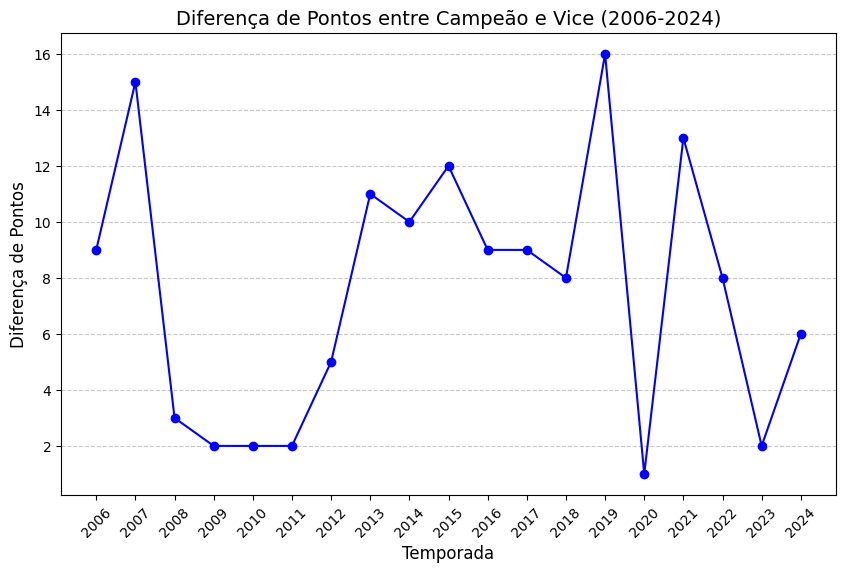

In [27]:
# Converter a coluna "Temporada" para string no DataFrame original
df["Temporada"] = df["Temporada"].astype(str)

# Selecionar apenas os dois primeiros colocados de cada temporada
top2 = df[df["Posicao"] <= 2].copy()

# Calcular a diferença de pontos entre o campeão e o vice
diferenca_pontos = top2.groupby("Temporada")["Pontos"].diff().dropna().abs()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(top2["Temporada"].unique(), diferenca_pontos, marker="o", color="blue")
plt.title("Diferença de Pontos entre Campeão e Vice (2006-2024)", fontsize=14)
plt.xlabel("Temporada", fontsize=12)
plt.ylabel("Diferença de Pontos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Ao observar o gráfico, percebemos que a diferença de pontos entre o primeiro e o segundo colocado variou bastante ao longo do período analisado, revelando padrões interessantes de alternância entre equilíbrio e supremacia.

---

###  Temporadas com campeões dominantes

Alguns anos se destacaram por apresentarem **diferenças muito grandes de pontos**, sugerindo temporadas em que o campeão foi amplamente superior ao vice:

- **2007**, **2015**, **2019** e **2021** são exemplos claros. Em especial:
  - **2019** teve a **maior diferença do período**, com impressionantes **16 pontos de vantagem** — um sinal de total domínio da equipe campeã.
  - **2007** e **2021** também tiveram diferenças **acima de 13 pontos**, mostrando campanhas muito sólidas e consistentes por parte dos campeões.

---

###  Temporadas extremamente equilibradas

Por outro lado, há anos em que a diferença de pontos foi **muito pequena**, indicando disputas decididas nos detalhes:

- **2008, 2009, 2010, 2011, 2020 e 2023** registraram **diferenças iguais ou menores que 2 pontos**.

O destaque aqui vai para **2020**, com apenas **1 ponto** separando o campeão do vice. Esse é o cenário ideal para os torcedores: **emoção até a última rodada**.

---

## Quais fatores mais influenciam a posição final dos times no Brasileirão?
Para responder a essa pergunta, utilizamos uma matriz de correlação, uma ferramenta estatística que permite analisar o grau de associação entre variáveis numéricas. Com ela, conseguimos entender quais aspectos do desempenho de um time têm maior impacto na sua colocação final na tabela.
Neste caso, investigamos três variáveis: Saldo de Gols, Número de Vitórias e Posição Final. A correlação varia entre -1 e 1, onde valores próximos de 1 indicam uma relação direta forte, enquanto valores próximos de -1 indicam uma relação inversa forte. Valores próximos de 0 sugerem pouca ou nenhuma relação.
O objetivo é descobrir o que mais influencia o sucesso de um time ao longo do campeonato: fazer muitos gols e sofrer poucos? Vencer mais partidas? Ou ambos?

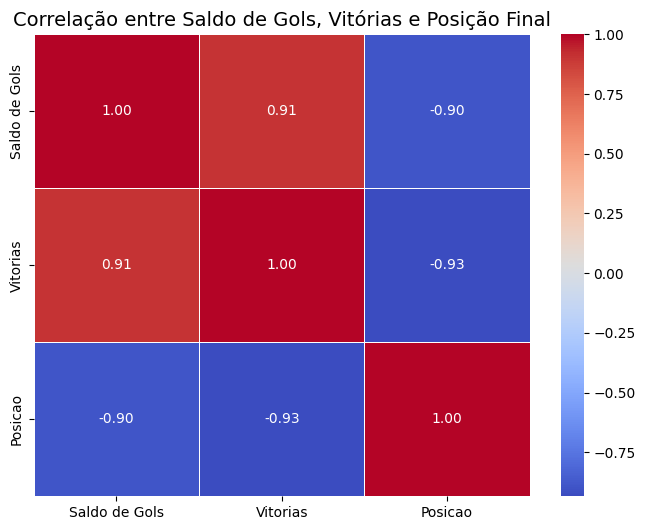

In [36]:
dados_corr = df[["Saldo de Gols", "Vitorias", "Posicao"]]

# Calcular a matriz de correlação
matriz_corr = dados_corr.corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Saldo de Gols, Vitórias e Posição Final", fontsize=14)
plt.show()

Ao observar a matriz de correlação, percebemos relações bastante fortes entre variáveis que medem o desempenho dos clubes no Brasileirão, revelando **o que mais influencia a posição final de um time** na tabela.

---

###  Fortes correlações positivas

Algumas variáveis caminham juntas, crescendo em conjunto e indicando desempenhos consistentes:

- A relação entre **Saldo de Gols** e **Vitórias** apresentou uma **correlação de 0.91**, extremamente forte.

  - Isso mostra que **vencer partidas** está fortemente ligado a **ter um saldo de gols positivo**, o que faz sentido: ao ganhar, os times normalmente marcam mais gols do que sofrem.
  - Essa correlação evidencia que **bons ataques e defesas sólidas** andam lado a lado com as vitórias.

---

###  Fortes correlações negativas com a posição final

Duas variáveis mostraram **correlações negativas muito fortes** com a posição final (lembrando que posições mais altas são numericamente menores: 1º lugar, 2º, etc.):

- **Vitórias x Posição Final** → **Correlação: -0.93**
  - Essa é a correlação mais forte da análise.
  - Quanto mais vitórias um time conquista, **melhor é sua colocação** na tabela.
  - Ou seja, **vencer jogos é o fator mais determinante para o sucesso no campeonato**.

- **Saldo de Gols x Posição Final** → **Correlação: -0.90**
  - Também muito forte.
  - Equipes com bons saldos de gols geralmente terminam **entre os primeiros colocados**, o que reforça a importância de um bom desempenho ofensivo e defensivo.

*Importante:* a correlação com a posição final é negativa porque **posições mais altas são representadas por números menores** (por exemplo, 1º lugar é melhor que 10º). Assim, quanto mais vitórias ou melhor o saldo de gols, **menor tende a ser o número da posição final** — o que indica um desempenho superior. Por isso, uma correlação negativa forte é **um ótimo sinal de impacto positivo no campeonato**.


---

## Qual a relação entre os Gols Sofridos e a Pontuação no Brasileirão?
Para responder a essa pergunta e explorar a relação entre o desempenho defensivo e a pontuação dos times, recorremos a um gráfico de regressão linear, que nos permite observar tendências entre duas variáveis de forma clara e objetiva.
Esse tipo de gráfico traça uma linha que melhor se ajusta aos pontos representando os dados. Se houver uma tendência clara a linha de regressão vai evidenciar essa relação.
Esse gráfico nos ajuda a testar visualmente a hipótese de que manter uma defesa sólida (sofrer poucos gols) contribui diretamente para um melhor desempenho na pontuação final do time.

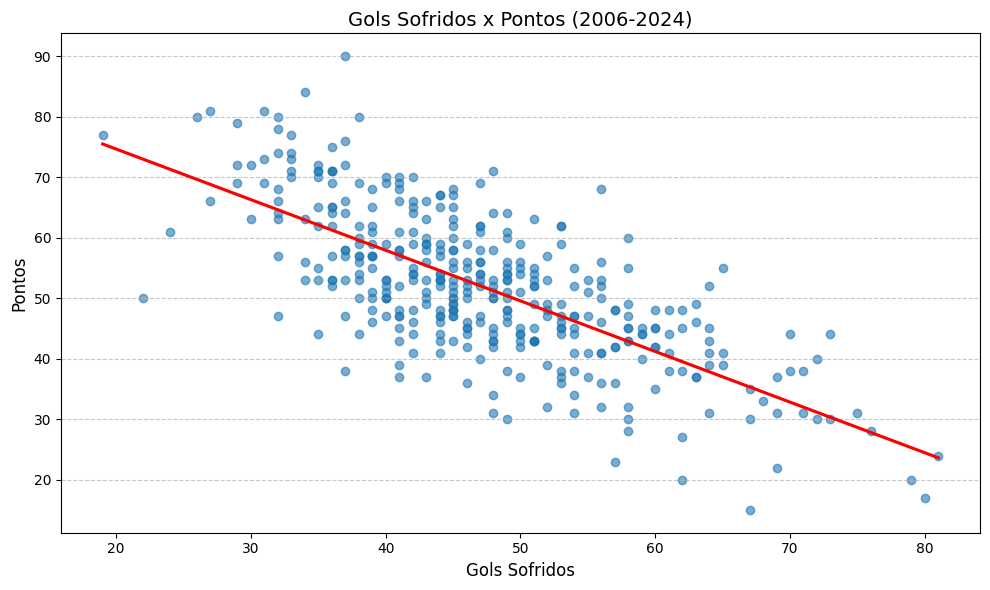

In [72]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="Gols sofridos",           # Eixo X: Gols sofridos
    y="Pontos",                  # Eixo Y: Pontos
    scatter_kws={"alpha": 0.6},  # Transparência dos Gols sofridos
    line_kws={"color": "red"},   # Cor da linha de regressão
    ci=None                      # Remove a banda de confiança
)

# Adicionar título e rótulos
plt.title("Gols Sofridos x Pontos (2006-2024)", fontsize=14)
plt.xlabel("Gols Sofridos", fontsize=12)
plt.ylabel("Pontos", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Gols Sofridos x Pontos: O que a regressão linear nos mostra?

Ao analisarmos o desempenho dos times do Brasileirão entre os anos de 2006 e 2024, o gráfico de **regressão linear entre Gols Sofridos e Pontos conquistados** revela um padrão bem estabelecido: **quanto mais gols uma equipe sofre, menor tende a ser sua pontuação final no campeonato**.

Esse tipo de análise é valioso porque não se limita a mostrar números isolados, mas sim a destacar uma tendência clara. A correlação negativa observada entre essas duas variáveis é significativa, sugerindo que a defesa tem um impacto direto no desempenho geral de uma equipe. Quanto mais vulnerável a defesa, menores as chances de acumular pontos ao longo do campeonato.

---

### O que é a Linha Vermelha ?

A linha vermelha no gráfico tem um papel fundamental: ela representa a melhor aproximação estatística do comportamento geral dos times ao longo dos anos. Trata-se da linha de regressão, que é calculada para mostrar de forma mais precisa a tendência entre as variáveis analisadas — neste caso, entre os gols sofridos e os pontos conquistados.

O que essa linha nos revela de forma clara é o seguinte: **à medida que os gols sofridos aumentam, a pontuação final tende a diminuir**. Ou seja, a linha reflete a relação negativa entre essas duas variáveis, ilustrando como a defesa de um time afeta diretamente seu desempenho no campeonato.

Embora exista alguma dispersão nos dados — o que é natural em qualquer análise de desempenho ao longo de um campeonato longo e imprevisível — **a linha vermelha ainda destaca um padrão consistente de queda**. Isso significa que, mesmo levando em conta a variação entre os times e suas campanhas, a relação entre gols sofridos e pontos é robusta, ou seja, **não é apenas uma coincidência**.

---

## Quais times marcam mais gols do que sofrem no Brasileirão?
Para responder a essa pergunta, utilizamos o método de agrupamento com o KMeans. Neste caso, aplicamos o K-Means para classificar os times com base em duas variáveis: Gols Marcados e Gols Sofridos. O objetivo é descobrir quais times têm um desempenho ofensivo superior ao defensivo, ou seja, marcam mais gols do que sofrem.

---

In [13]:
dados_defensivos_ofensivos = df[["Gols marcados", "Gols sofridos"]]

In [46]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dados_defensivos_ofensivos)

KMeans(n_clusters=4, random_state=42)

In [47]:
kmeans_labels = kmeans.labels_


Vamos calar o número ideal de clusters para o KMeans. Para isso, utilizamos o método do cotovelo, que nos ajuda a identificar o número ótimo de grupos a serem formados. O gráfico resultante mostra a soma dos erros quadráticos (SSE) em relação ao número de clusters. O ponto onde a curva começa a se estabilizar indica o número ideal de clusters.
A partir desse ponto, podemos aplicar o KMeans e visualizar os resultados em um gráfico de dispersão. Os pontos representam os times, enquanto as cores indicam a qual cluster cada time pertence.



In [48]:
kmeans.inertia_

28261.889836717033

In [49]:
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dados_defensivos_ofensivos)
    inertias.append(kmeans.inertia_)

<Axes: >

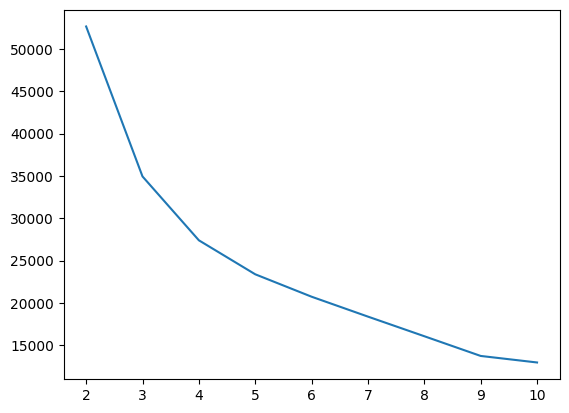

In [50]:
sns.lineplot(x=range(2, 11), y=inertias)

Notamos que o gráfico começa a se estabilar entre 4 e 5 clusters, o que sugere que esses são os números ideais para a análise.
A partir disso, aplicamos o KMeans com 4 clusters e visualizamos os resultados em um gráfico de dispersão.

<Axes: xlabel='Gols marcados', ylabel='Gols sofridos'>

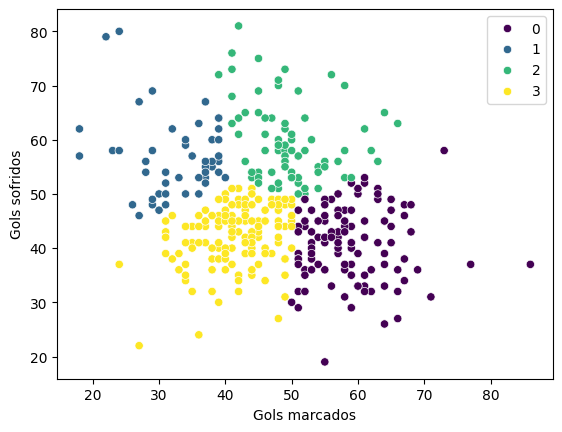

In [51]:
sns.scatterplot(
    x=dados_defensivos_ofensivos["Gols marcados"],
    y=dados_defensivos_ofensivos["Gols sofridos"],
    hue=kmeans_labels,
    palette="viridis",
)

## Quais foram os outliers de pontos entre 2006 e 2024?
Para responder a essa pergunta, utilizaremos o gráfico de boxplot, que nos permitirá visualizar os outliers de forma clara e objetiva. O boxplot é uma ferramenta estatística que mostra a distribuição dos dados, destacando os valores atípicos (outliers) que estão além do intervalo interquartil. Os otliers são os pontos que estão muito distantes da média e podem indicar desempenhos excepcionais ou muito abaixo do esperado. No contexto do Campeonato Brasileiro, esses outliers podem representar clubes que tiveram temporadas extraordinárias ou desastrosas.


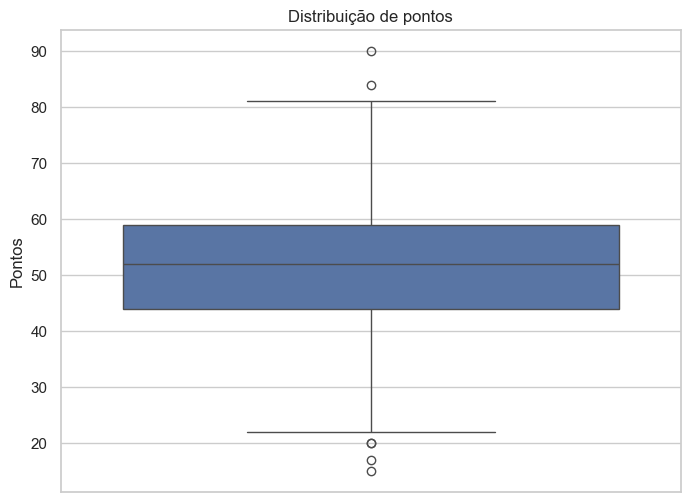

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y="Pontos", data=df)
plt.title("Distribuição de pontos")
plt.show()

Precisamos agora identificar tais outliers. Para isso iremos calcular os intervalos interquartis e os limites superior e inferior. Os limites são definidos como:
- Limite Inferior: Q1 - 1.5 * IQR
- Limite Superior: Q3 + 1.5 * IQR
Onde Q1 é o primeiro quartil, Q3 é o terceiro quartil e IQR é a amplitude interquartil (IQR = Q3 - Q1). Os valores que estão abaixo do limite inferior ou acima do limite superior são considerados outliers.

In [11]:
# Calcular Q1, Q3 e IQR
Q1 = df['Pontos'].quantile(0.25)
Q3 = df['Pontos'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os outliers
outliers = df[(df['Pontos'] < limite_inferior) | (df['Pontos'] > limite_superior)]
for index, row in outliers.iterrows():
    print(f"Time: {row['Time']}, Temporada: {row['Temporada']}, Pontos: {row['Pontos']}")

Time: América - RN, Temporada: 2007, Pontos: 17
Time: Náutico, Temporada: 2013, Pontos: 20
Time: Flamengo, Temporada: 2019, Pontos: 90
Time: Avaí, Temporada: 2019, Pontos: 20
Time: Atlético Mineiro, Temporada: 2021, Pontos: 84
Time: Chapecoense, Temporada: 2021, Pontos: 15



Os maiores outliers do Brasileirão são:
- 2019 - Flamengo - 90 pontos
- 2021 - Atlético Mineiro - 84 pontos

Os menores outliers do Brasileirão são: 
- 2021 - Chapecoense - 15 pontos
- 2007 - América-RN - 17 pontos
- 2013 - Náutico - 20 pontos
- 2019 - Avaí - 20 pontos